Importing necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# To ignore all warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [5]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/Javin Programming/machine learning files/Cohort/Capstone Project/survey.csv")
print("Data imported")

Data imported


In [6]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
(df == 0).sum() # Checking all the zero values in data

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

In [8]:
(df.isnull()).sum() # Checking the null values in the features

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [9]:
df['Country'].value_counts() #Checking value counts of Country

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

Selecting only the top 10 countries with most responses, as majority of them had very minimal responses as compared to these, so that wouldn't give much idea about the data

In [10]:
df = df[df['Country'].isin(['United States', 'United Kingdom', 'Canada', 'Germany', 'Ireland', 'Netherlands', 'Australia', 'France', 'India', 'New Zealand'])]

The feature `Timestamp` had no role in our data keeping the objective of the project in mind

In `comments` column, there were very few responses, and also processing this feature would have been beyond the scope of this project

`state` feature is not available to every row, only for USA, so removed it

In [11]:
df = df.drop(columns=['state', 'comments', 'Timestamp'], axis=1)

In [12]:
df['Gender'] = df['Gender'].astype(str).str.lower() # Turning all Genders into lower case for easier handling
df['Gender'].value_counts()

Gender
male                                              745
female                                            173
m                                                 142
f                                                  52
make                                                4
woman                                               4
male                                                3
cis male                                            3
female (trans)                                      2
man                                                 2
female                                              2
queer/she/they                                      1
trans-female                                        1
cis man                                             1
femail                                              1
p                                                   1
mail                                                1
female (cis)                                        1
queer                

In [13]:
gender_map ={
    'm': 'Male',
    'make': 'Male',
    'cis male': 'Male',
    'man': 'Male',
    'msle': 'Male',
    'mail': 'Male',
    'malr': 'Male',
    'cis man': 'Male',
    'male (cis)': 'Male',
    'maile': 'Male',
    'mal': 'Male',
    'male': 'Male',
    'male ': 'Male',

    'f': 'Female',
    'woman': 'Female',
    'female (cis)': 'Female',
    'cis-female/femme': 'Female',
    'femail': 'Female',
    'cis female': 'Female',
    'femake': 'Female',
    'female': 'Female',
    'female ': 'Female',

    'female (trans)': 'Other',
    'male leaning androgynous': 'Other',
    'trans woman': 'Other',
    'neuter': 'Other',
    'queer': 'Other',
    'p': 'Other',
    'a little about you': 'Other',
    'guy (-ish) ^_^': 'Other',
    'fluid': 'Other',
    'agender': 'Other',
    'male-ish': 'Other',
    'trans-female': 'Other',
    'something kinda male?': 'Other',
    'queer/she/they': 'Other',
    'androgyne': 'Other',
    'non-binary': 'Other',
    'nah': 'Other',
    'all': 'oOher',
    'enby': 'Other',
    'genderqueer': 'Other',
    'ostensibly male, unsure what that really means': 'Other'
}

In [14]:
df['Gender'] = df['Gender'].map(gender_map)

In [15]:
df = df.drop('self_employed', axis=1)

In [16]:
df['work_interfere'].value_counts()

work_interfere
Sometimes    440
Never        195
Rarely       159
Often        129
Name: count, dtype: int64

In [17]:
df['work_interfere'] = df['work_interfere'].fillna("Unknown") #Filling NaN values with 'Unknown'

In [18]:
number_emp_map = {
    '1-5': 'Small',
    '6-25': 'Small',
    '26-100': 'Medium',
    '100-500': 'Medium',
    '500-1000': 'Large',
    'More than 1000': 'Large'
}

In [19]:
df['no_employees'] = df['no_employees'].map(number_emp_map)

In [20]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [21]:
leave_map = {
    'Somewhat easy': 'Easy',
    'Very easy': 'Easy',
    'Somewhat difficult': 'Difficult',
    'Very difficult': 'Difficult',
    "Don't know": "Don't know"
}

df['leave'] = df['leave'].map(leave_map)

Keeping the age in a practically possible range

In [22]:
df = df[(df['Age'] >= 19) & (df['Age'] <= 80)]

As the objective of the project is for techies, we only need those entries of people in tech companies

In [23]:
df = df[(df['tech_company'] == 'Yes')]

df = df.drop("tech_company", axis=1)

These features were not relevant for our purpose, our focus is on mental health

In [24]:
df = df.drop(columns=['phys_health_consequence', 'phys_health_interview', 'mental_vs_physical', 'mental_health_interview'])

In [25]:
cowork_map = {
    'Some of them': "Yes",
    "No": "No",
    "Yes": "Yes"
}

df['coworkers'] = df['coworkers'].map(cowork_map)

In [26]:
supervisor_map = {
    'Some of them': 'Yes',
    'No': 'No',
    'Yes': 'Yes'
}

df['supervisor'] = df['supervisor'].map(supervisor_map)

# UNIVARIATE ANALYSIS

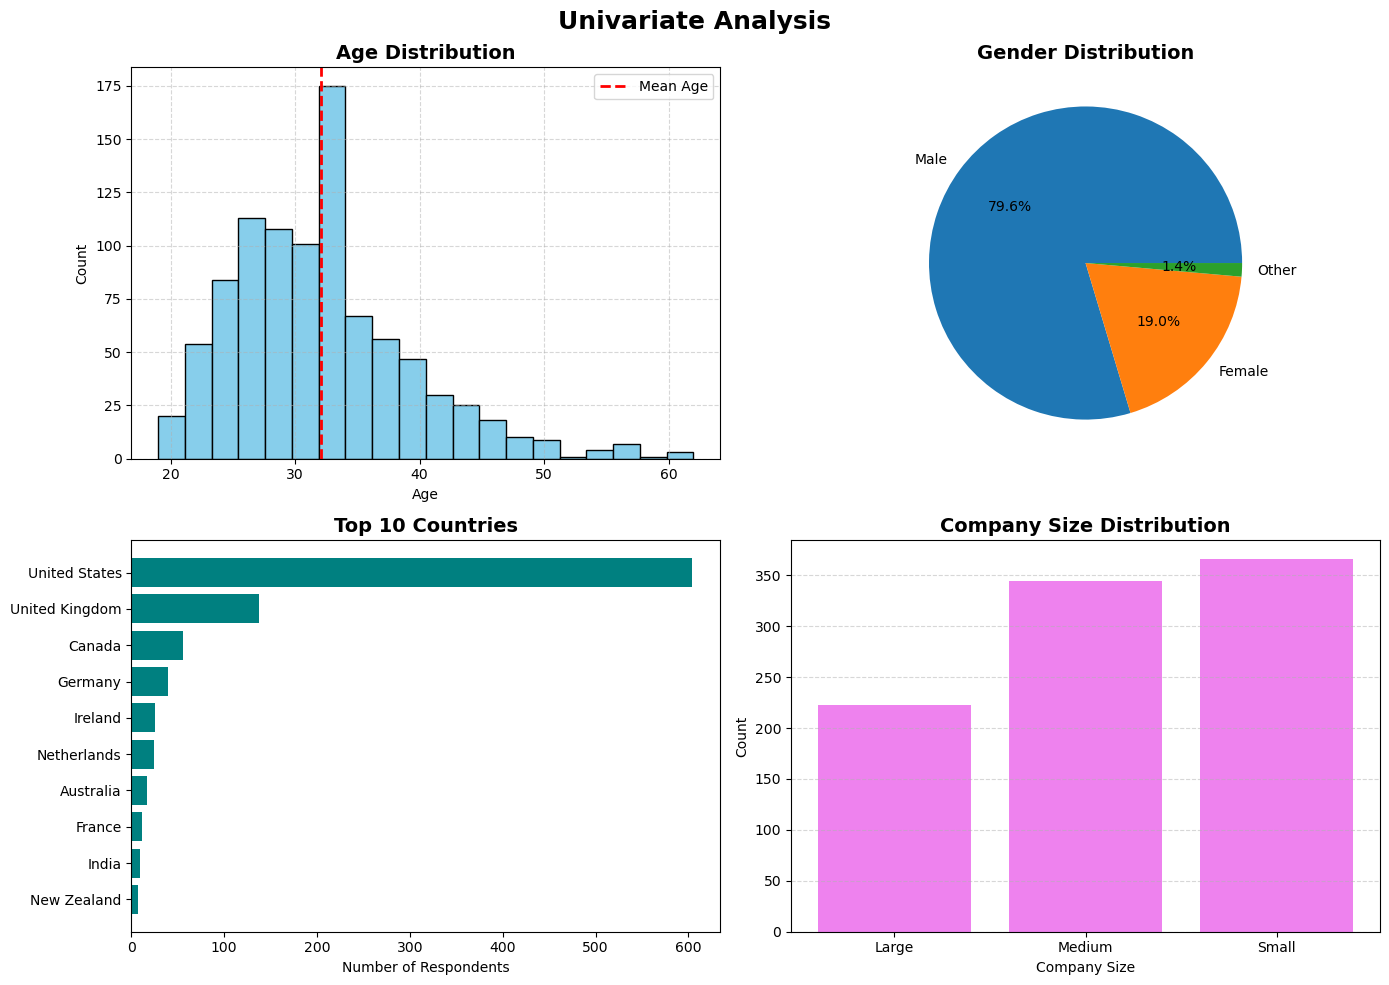

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Univariate Analysis", fontsize=18, fontweight='bold')

# 1. Age Histogram
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean Age')
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# 2. Gender Pie Chart
gender_counts = df['Gender'].value_counts()
axes[0, 1].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
)
axes[0, 1].set_title('Gender Distribution', fontsize=14, fontweight='bold')

# 3. Top 10 Countries
top_countries = df['Country'].value_counts().head(10)
axes[1, 0].barh(top_countries.index[::-1], top_countries.values[::-1], color='teal')
axes[1, 0].set_title('Top 10 Countries', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Respondents')

# 4. Company Size
sizes = df['no_employees'].value_counts().sort_index()
axes[1, 1].bar(sizes.index.astype(str), sizes.values, color='violet')
axes[1, 1].set_title('Company Size Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Company Size')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


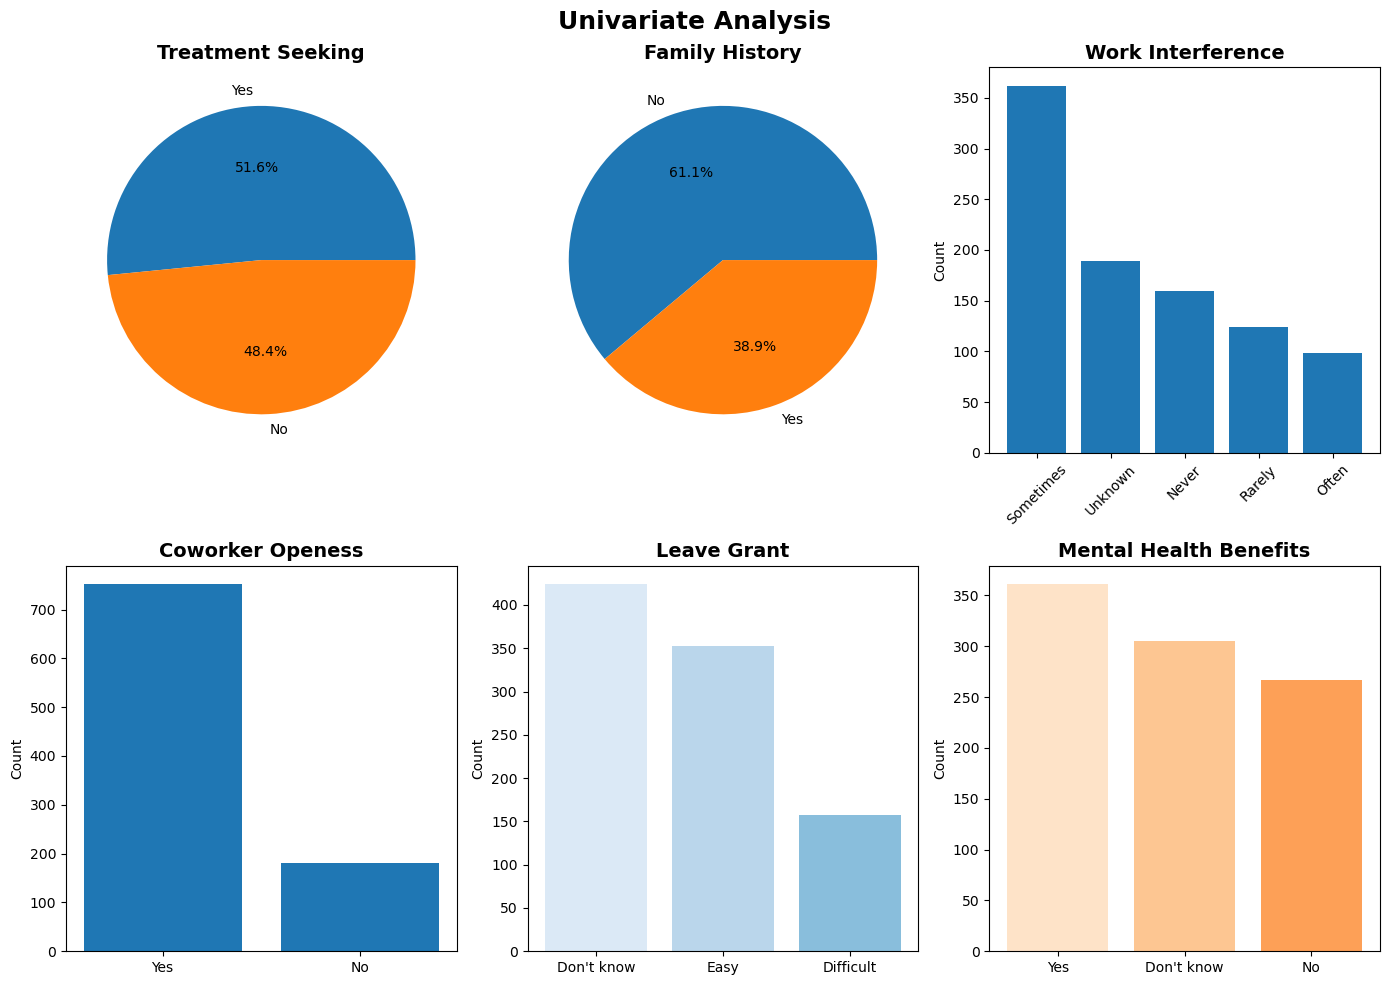

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle("Univariate Analysis", fontsize=18, fontweight='bold')
# PLot 1. Treatment Seeking
axes[0, 0].pie(
    df['treatment'].value_counts(),
    labels=df['treatment'].value_counts().index,
    autopct='%1.1f%%'
)
axes[0, 0].set_title('Treatment Seeking', fontsize=14, fontweight='bold')

# Plot 2. Family History
axes[0, 1].pie(
    df['family_history'].value_counts(),
    labels = df['family_history'].value_counts().index,
    autopct = '%1.1f%%'
)
axes[0, 1].set_title('Family History', fontsize=14, fontweight='bold')

# Plot 3. Work Interference
axes[0, 2].bar(
    df['work_interfere'].value_counts().index,
    df['work_interfere'].value_counts().values,
)
axes[0, 2].set_title('Work Interference', fontsize=14, fontweight='bold')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].set_ylabel('Count')

# Plot 4. Remote Work
axes[1, 0].bar(
    df['coworkers'].value_counts().index,
    df['coworkers'].value_counts().values,
)
axes[1, 0].set_title('Coworker Openess', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Count')

# Plot 5. Leave
axes[1, 1].bar(
    df['leave'].value_counts().index,
    df['leave'].value_counts().values,
    color=sns.color_palette("Blues")
)
axes[1, 1].set_title('Leave Grant', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x')
axes[1, 1].set_ylabel('Count')

# Plot 6. Mental Health Benefits
axes[1, 2].bar(
    df['benefits'].value_counts().index,
    df['benefits'].value_counts().values,
    color=sns.color_palette("Oranges")
)
axes[1, 2].set_title('Mental Health Benefits', fontsize=14, fontweight='bold')
axes[1, 2].tick_params(axis='x')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS

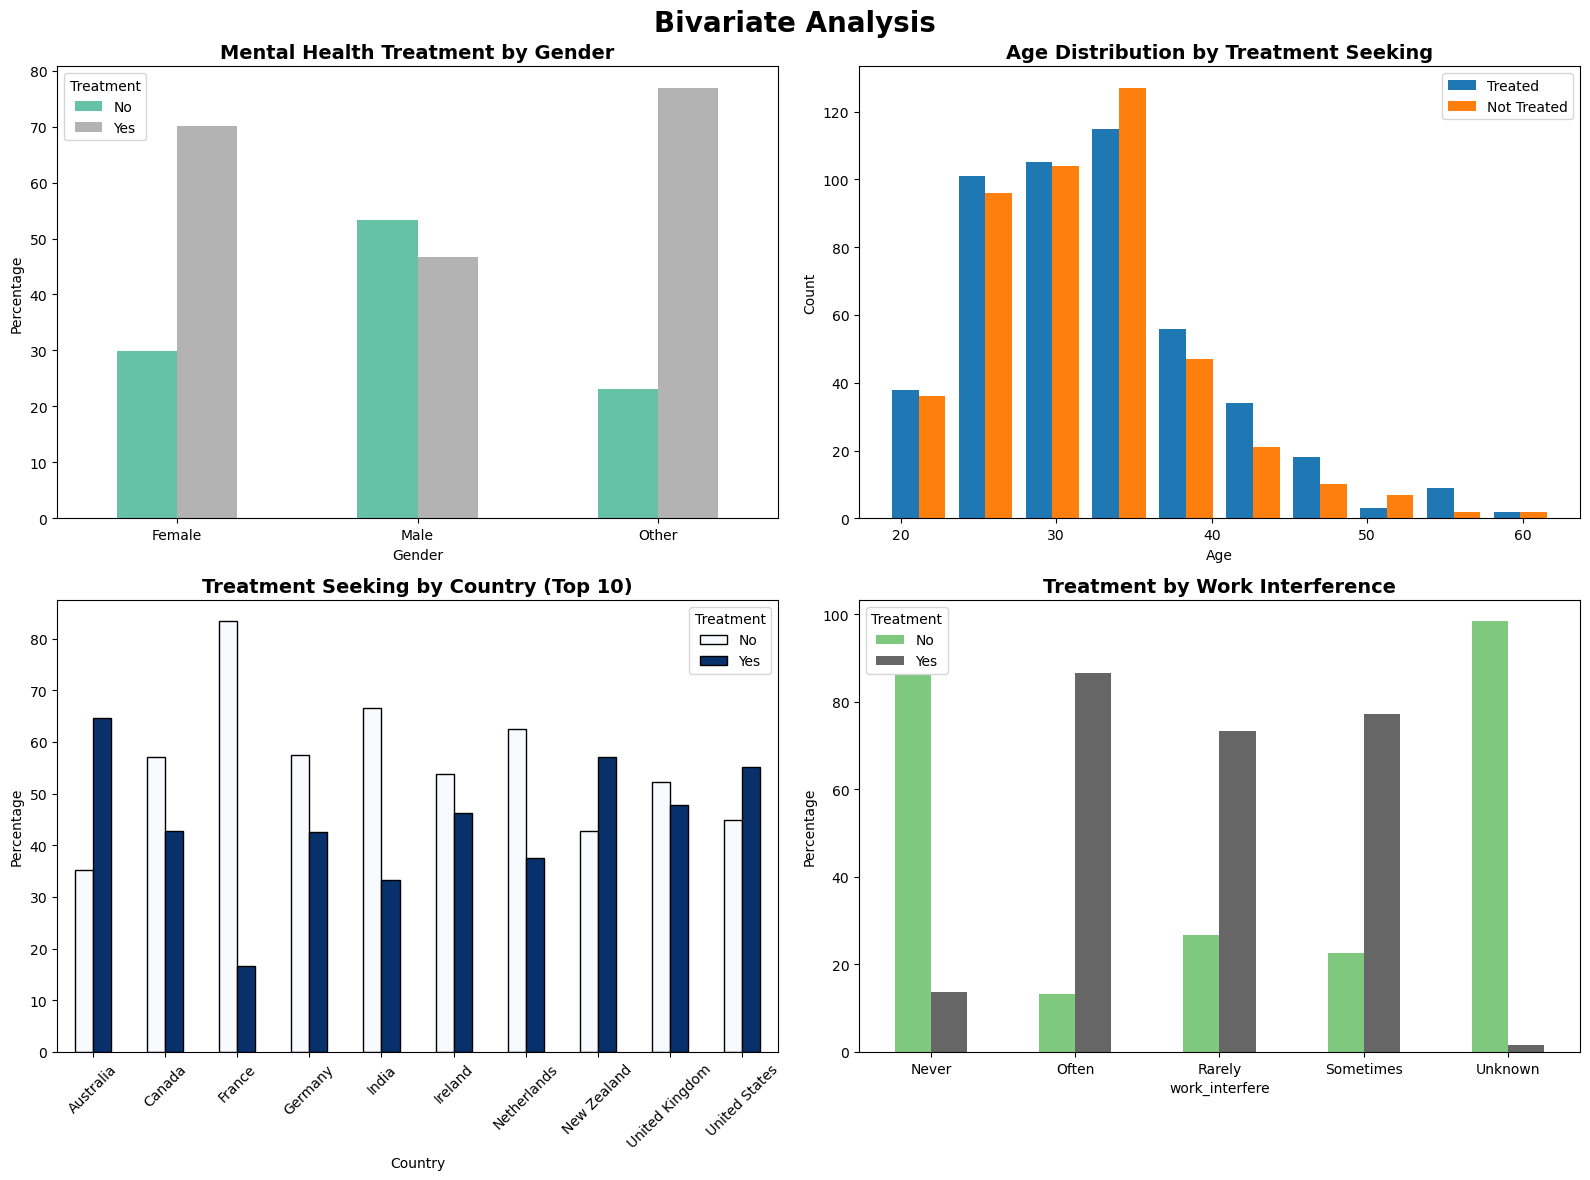

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Bivariate Analysis", fontsize=20, fontweight='bold')

# Helper function for percentage bar plots
def plot_percentage_bar(ax, col, title, cmap):
    ctab = pd.crosstab(df[col], df['treatment'], normalize='index') * 100
    ctab.plot(kind='bar', ax=ax, colormap=cmap)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation = 0)
    ax.legend(title='Treatment')

# Gender vs Treatment
plot_percentage_bar(axes[0, 0], 'Gender', 'Mental Health Treatment by Gender', 'Set2')

# Age vs Treatment
treated = df[df['treatment'] == 'Yes']['Age']
untreated = df[df['treatment'] == 'No']['Age']
axes[0, 1].hist([treated, untreated], bins=10, label=['Treated', 'Not Treated'])
axes[0, 1].set_title('Age Distribution by Treatment Seeking', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()

# Country vs Treatment
top_countries = df['Country'].value_counts().nlargest(10).index
df_top = df[df['Country'].isin(top_countries)]
ctab_country = pd.crosstab(df_top['Country'], df_top['treatment'], normalize='index') * 100
ctab_country.plot(kind='bar', ax=axes[1, 0], colormap='Blues', edgecolor='black')
axes[1, 0].set_title('Treatment Seeking by Country (Top 10)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Treatment')

# Work Interfere vs Treatment
plot_percentage_bar(axes[1, 1], 'work_interfere', 'Treatment by Work Interference', 'Accent')

plt.tight_layout()
plt.show()

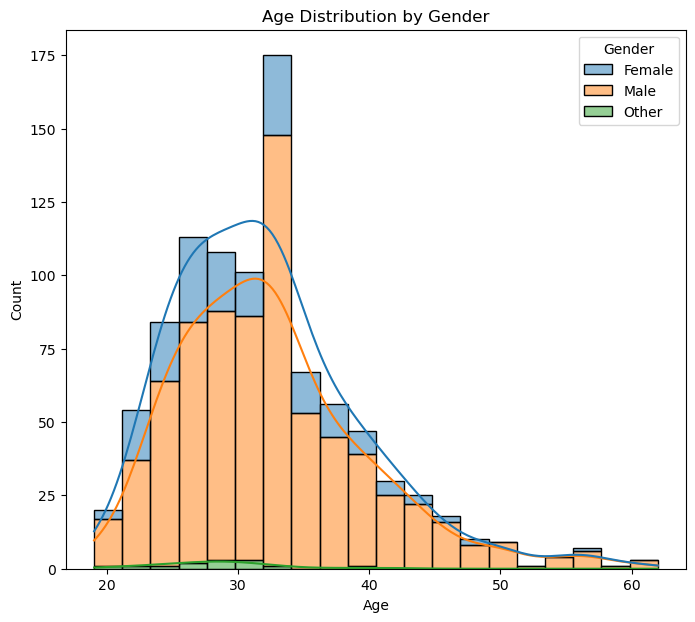

In [30]:
plt.figure(figsize=(8, 7))
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Gender', multiple='stack')
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# MULTIVARIATE ANALYSIS

Printing Heatmap...


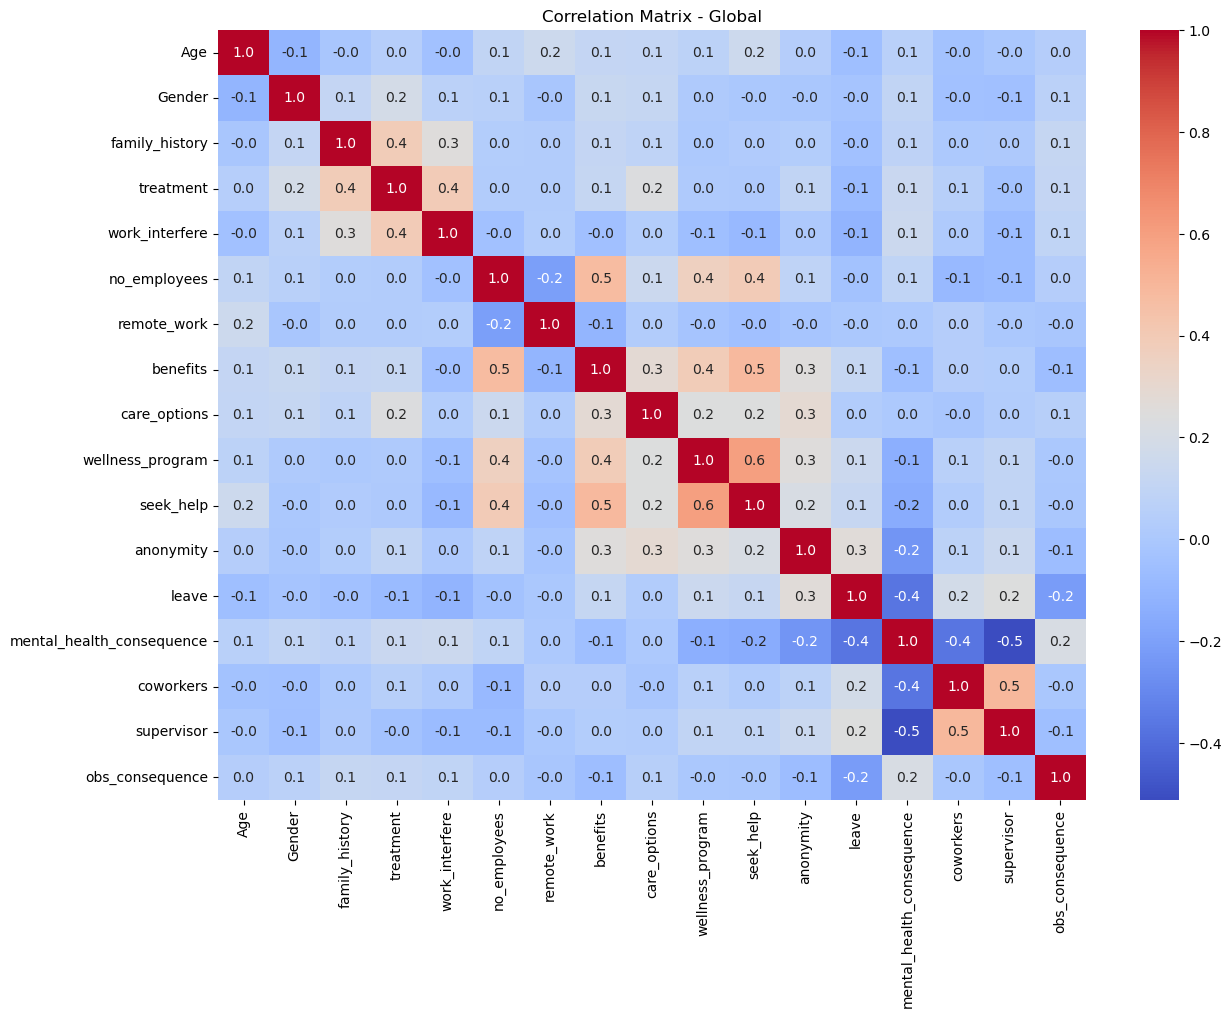

Heatmap printed successfully!


In [31]:
df_binary = df.copy()
df_binary = df_binary.drop(columns=['Country'])


mappings = {
    'obs_consequence': {'Yes': 1, 'No': 0},
    'supervisor': {'Yes': 1, 'No': 0},
    'coworkers': {'Yes': 1, 'No': 0},
    'mental_health_consequence': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'leave': {'Easy': 1, 'Difficult': 0, "Don't know": 0.5},
    'anonymity': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'seek_help': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'wellness_program': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'care_options': {'Yes': 1, 'No': 0, 'Not sure': 0.5},
    'benefits': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'remote_work': {'Yes': 1, 'No': 0},
    'no_employees': {'Small': 0, 'Medium': 0.5, 'Large': 1},
    'work_interfere': {'Unknown': 0.5, 'Rarely': 0, 'Never': 0, 'Often': 1, 'Sometimes': 1},
    'treatment': {'Yes': 1, 'No': 0},
    'family_history': {'Yes': 1, 'No': 0},
    'self_employed': {'Yes': 1, 'No': 0},
    'Gender': {'Male': 0, 'Female': 1, 'Other': 0.5}
}

# Apply binary mappings
for col, mapping in mappings.items():
    if col in df_binary.columns:
        df_binary[col] = df_binary[col].map(mapping)

df_binary = df_binary.dropna()

df_corr = df_binary.corr()

print("Printing Heatmap...")

plt.figure(figsize=(14, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix - Global")
plt.show()

print("Heatmap printed successfully!")

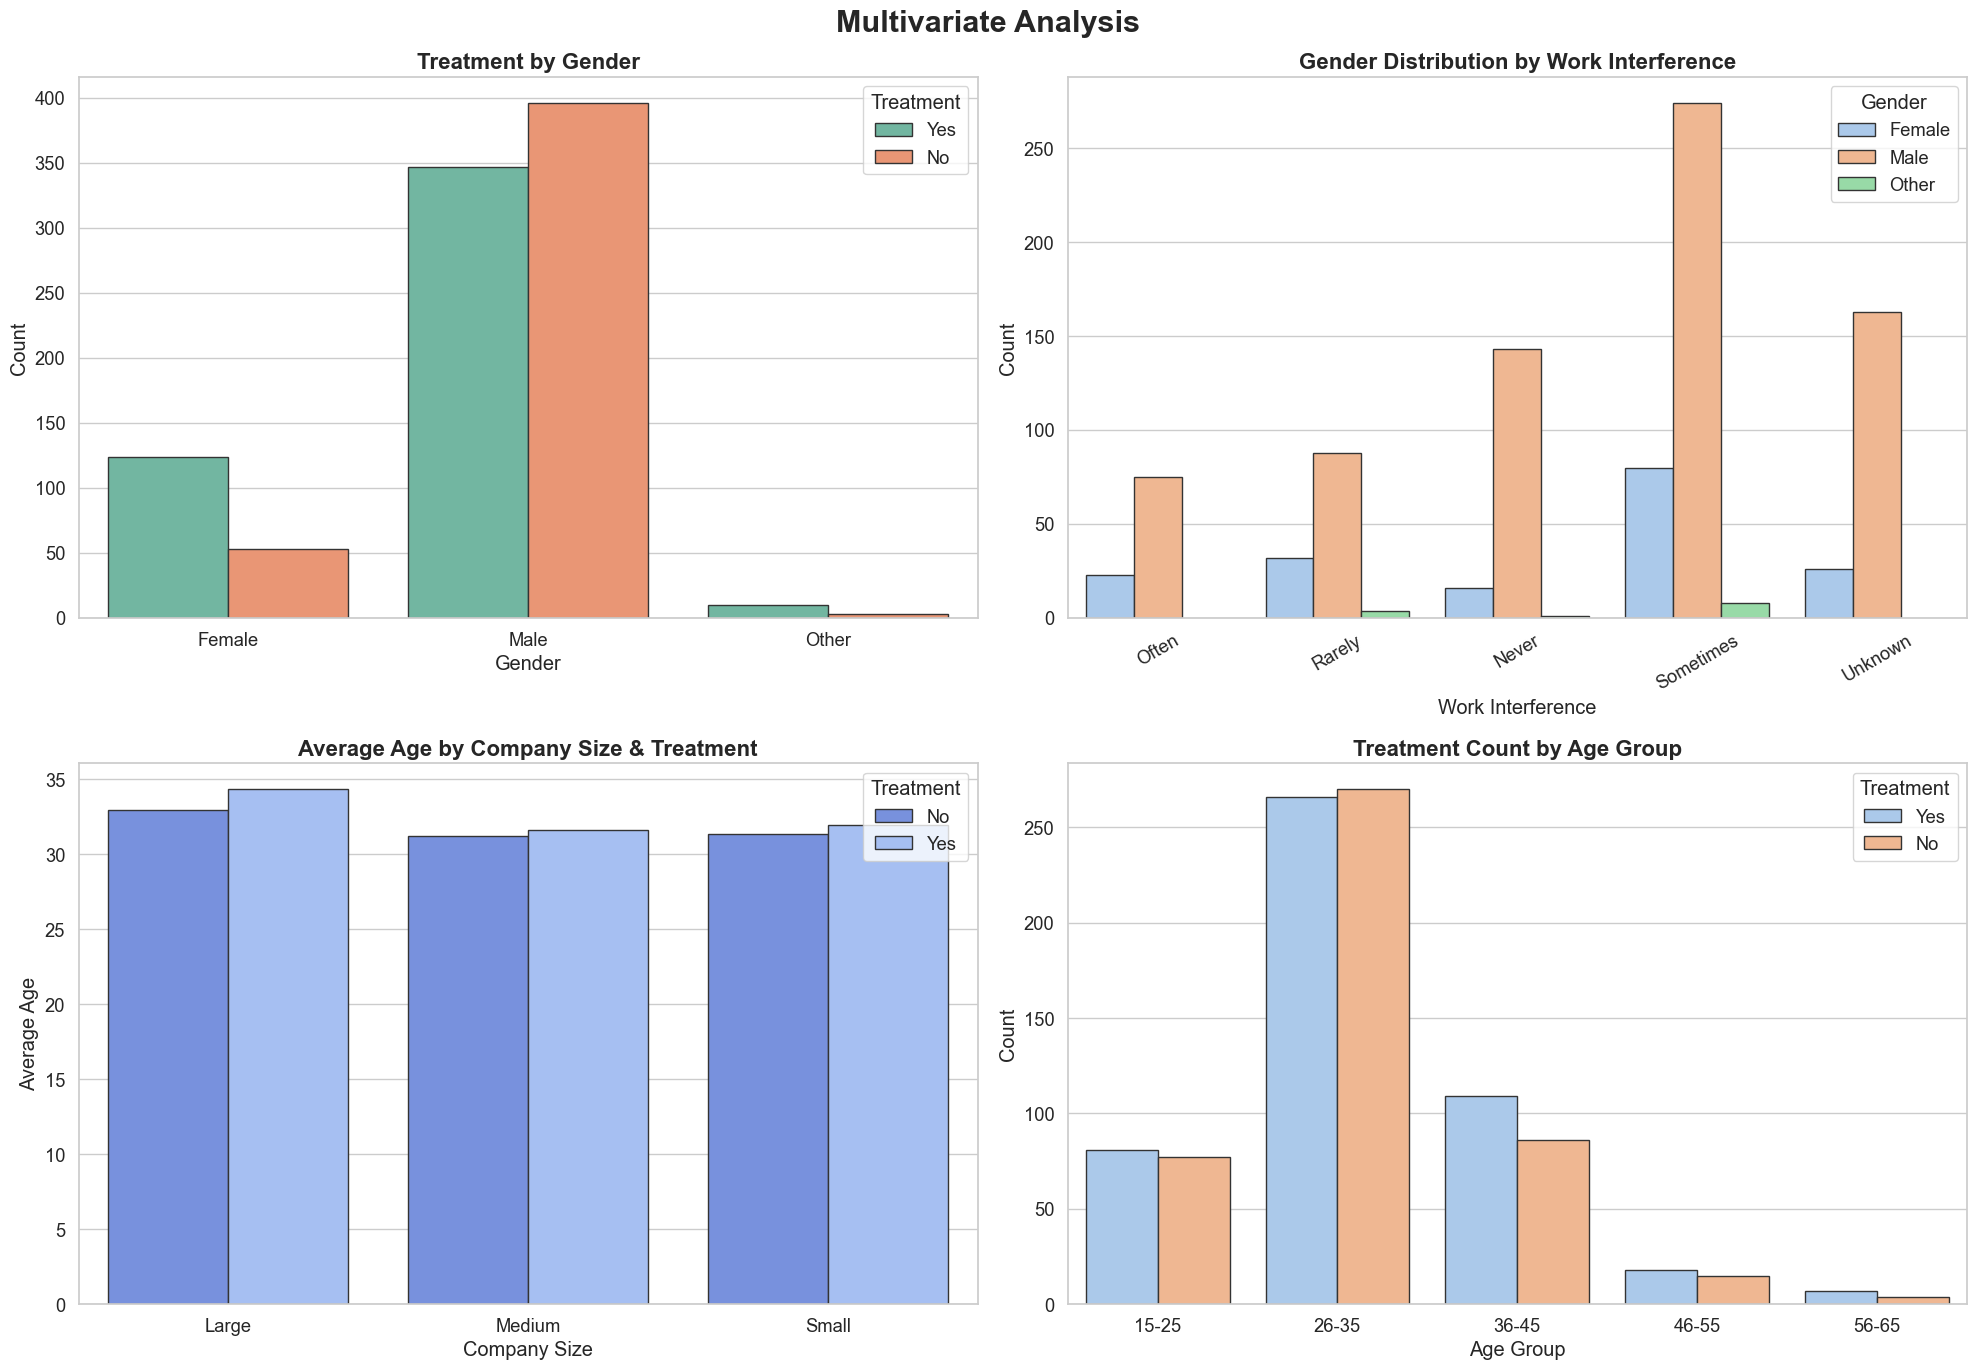

In [32]:
# Set plot style
sns.set_theme(style="whitegrid", font_scale=1.2)
custom_palette1 = sns.color_palette("Set2")
custom_palette2 = sns.color_palette("pastel")
custom_palette3 = sns.color_palette("coolwarm")

# Create age groups
df['age_group'] = pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 65],
                         labels=['15-25', '26-35', '36-45', '46-55', '56-65'])

# Compute average age by company size and treatment
age_company_treatment = df.groupby(['no_employees', 'treatment'])['Age'].mean().reset_index()

# Create subplot layout
fig, axs = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle("Multivariate Analysis", fontsize=22, fontweight='bold')

# 1. Gender vs Treatment
sns.countplot(
    x='Gender', hue='treatment', data=df,
    palette=custom_palette1, ax=axs[0, 0], edgecolor=".2"
)
axs[0, 0].set_title('Treatment by Gender', fontsize=16, weight='bold')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')
axs[0, 0].tick_params(axis='x')
axs[0, 0].legend(title='Treatment', loc='upper right')

# 2. Work Interference vs Gender
sns.countplot(
    x='work_interfere', hue='Gender',
    data=df,
    palette=custom_palette2, ax=axs[0, 1], edgecolor=".2"
)
axs[0, 1].set_title('Gender Distribution by Work Interference', fontsize=16, weight='bold')
axs[0, 1].set_xlabel('Work Interference')
axs[0, 1].set_ylabel('Count')
axs[0, 1].tick_params(axis='x', rotation=30)
axs[0, 1].legend(title='Gender', loc='upper right')


# 3. Avg Age vs Company Size vs Treatment 
sns.barplot(
    x='no_employees', y='Age', hue='treatment',
    data=age_company_treatment, palette=custom_palette3, ax=axs[1, 0], edgecolor=".2"
)
axs[1, 0].set_title('Average Age by Company Size & Treatment', fontsize=16, weight='bold')
axs[1, 0].set_xlabel('Company Size')
axs[1, 0].set_ylabel('Average Age')
axs[1, 0].tick_params(axis='x')
axs[1, 0].legend(title='Treatment', loc='upper right')

# 4. Age Group vs Treatment
sns.countplot(
    x='age_group', hue='treatment', data=df,
    palette=custom_palette2, ax=axs[1, 1], edgecolor=".2"
)
axs[1, 1].set_title('Treatment Count by Age Group', fontsize=16, weight='bold')
axs[1, 1].set_xlabel('Age Group')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x')
axs[1, 1].legend(title='Treatment', loc='upper right')

plt.tight_layout()
plt.show()


In [33]:
joblib.dump(df, 'df.pkl')

['df.pkl']